# Global Power Plant Database
Problem Statement: Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5] country_long (text): longer form of the country designation name (text): name or title of the power plant, generally in Romanized form gppd_idnr (text): 10 or 12 character identifier for the power plant capacity_mw (number): electrical generating capacity in megawatts latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) primary_fuel (text): energy source used in primary electricity generation or export other_fuel1 (text): energy source used in electricity generation or export other_fuel2 (text): energy source used in electricity generation or export other_fuel3 (text): energy source used in electricity generation or export commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available owner (text): majority shareholder of the power plant, generally in Romanized form source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form url (text): web document corresponding to the source field geolocation_source (text): attribution for geolocation information wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database. year_of_capacity_data (number): year the capacity information was reported generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013 generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014 generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015 generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016 generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017 generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018 generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019 generation_data_source (text): attribution for the reported generation information estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013 estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 'estimated_generation_note_2013(text): label of the model/method used to estimate generation for the year 2013estimated_generation_note_2014(text): label of the model/method used to estimate generation for the year 2014estimated_generation_note_2015(text): label of the model/method used to estimate generation for the year 2015estimated_generation_note_2016(text): label of the model/method used to estimate generation for the year 2016estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 Fuel Type Aggregation We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

Find the dataset link below.

Downlaod Files: https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#upload file
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
#check datatype of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

# Exploratory Data Analysis


In [5]:
df.shape

(908, 25)

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
#all descrption of numeric data
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [8]:
#all column name
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

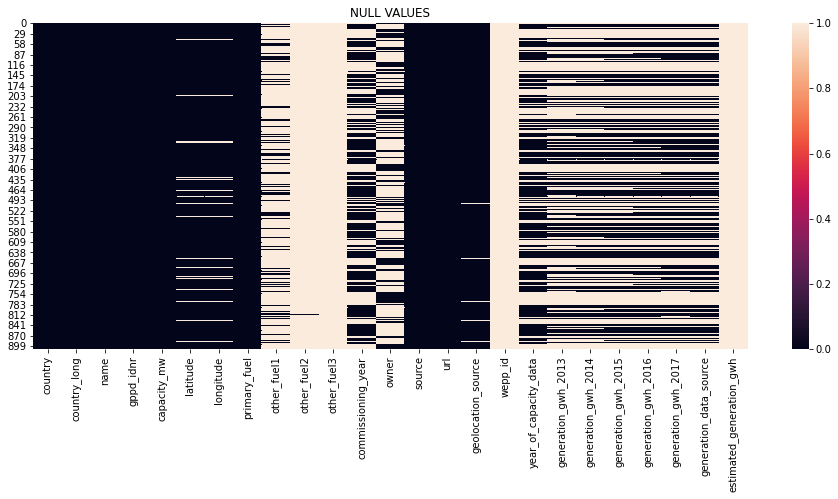

In [9]:
#check null values using heat map so many columns are having null values  other_fuel1,other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

In [10]:
# Checking null values in the dataframe
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can obeserve  other_fuel1,other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh having 90% above Null Values so better we will remove these columns from dataset

In [11]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [12]:
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

We can observe from above country,country_long,year_of_capacity_data,generation_data_source all are having only one type data present in these columns so better to drop them

In [13]:
df.drop(['country','country_long','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

In [14]:
df.nunique()

name                   908
gppd_idnr              908
capacity_mw            365
latitude               837
longitude              828
primary_fuel             8
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64

We can observe from above from  above name,gppd_idnr and url not giving any information so we will drop them
onwer is also not useful so will drop that also

In [15]:
df.drop(['name','url','gppd_idnr','owner'],axis=1,inplace=True)

In [16]:
#check unique category of fearture
df.nunique()

capacity_mw            365
latitude               837
longitude              828
primary_fuel             8
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64

In [17]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


We can observe some columns are having null values will fill with median of that column to fill null.

In [18]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2013"] = df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

In [ ]:
#Replacing NaN values in numerical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode())
df["Gender"] = df["Gender"].fillna(df["Gender"].mode())
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode())
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode())
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())


In [19]:
#Replacing null values in categorical columns
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [20]:
#all are without null
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>]],
      dtype=object)

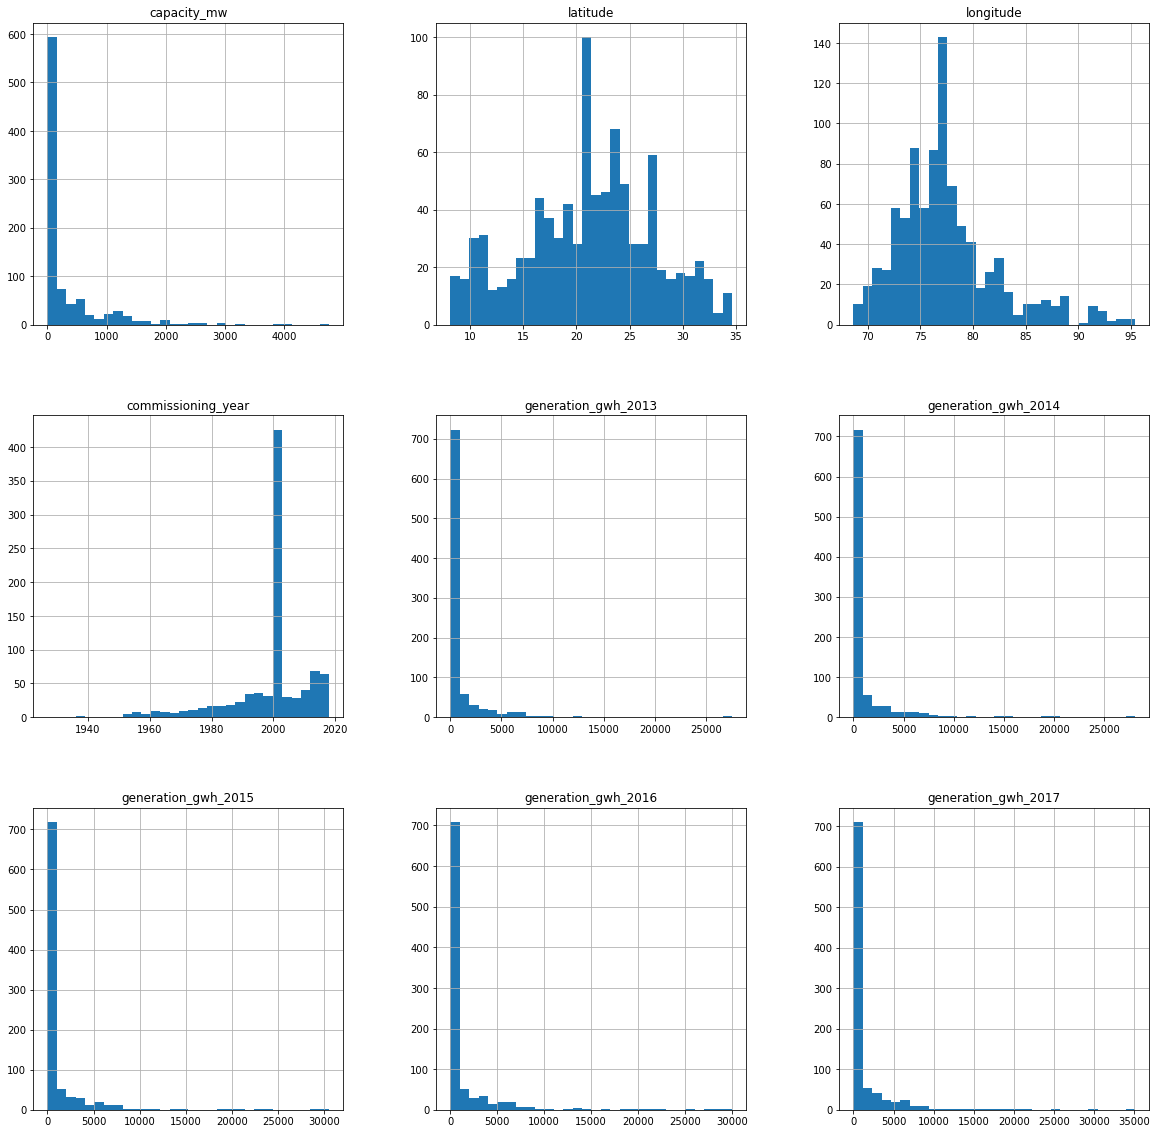

In [21]:
df.hist(figsize=(20,20), grid = True, layout = (3,3), bins = 30)

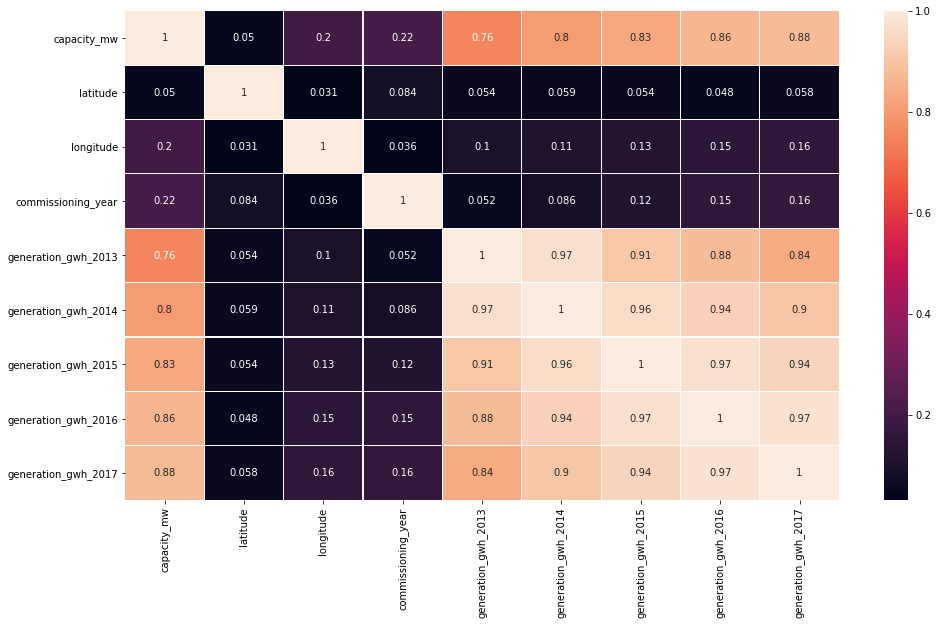

In [22]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

Using heatmap we can observe generation_gwh_2013, generation_gwh_2014,generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are positively correlated to capacity_mw and latitude is negative correlated 

Below using boxplt we can see many columns are having outliers latitude, generation_gwh_2013, generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 

capacity_mw               AxesSubplot(0.125,0.749828;0.0945122x0.130172)
latitude               AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
longitude              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
commissioning_year     AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
generation_gwh_2013    AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
generation_gwh_2014    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
generation_gwh_2015    AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
generation_gwh_2016       AxesSubplot(0.125,0.593621;0.0945122x0.130172)
generation_gwh_2017    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
dtype: object

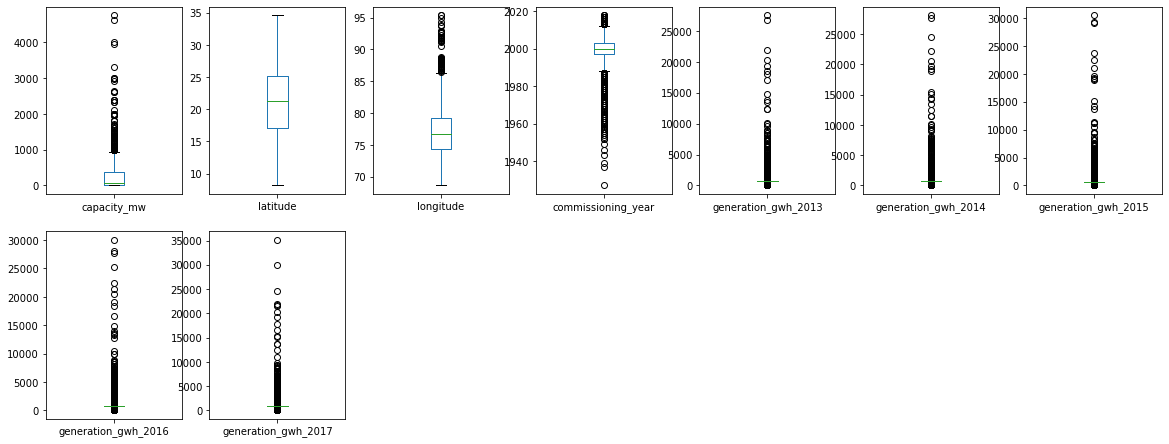

In [23]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

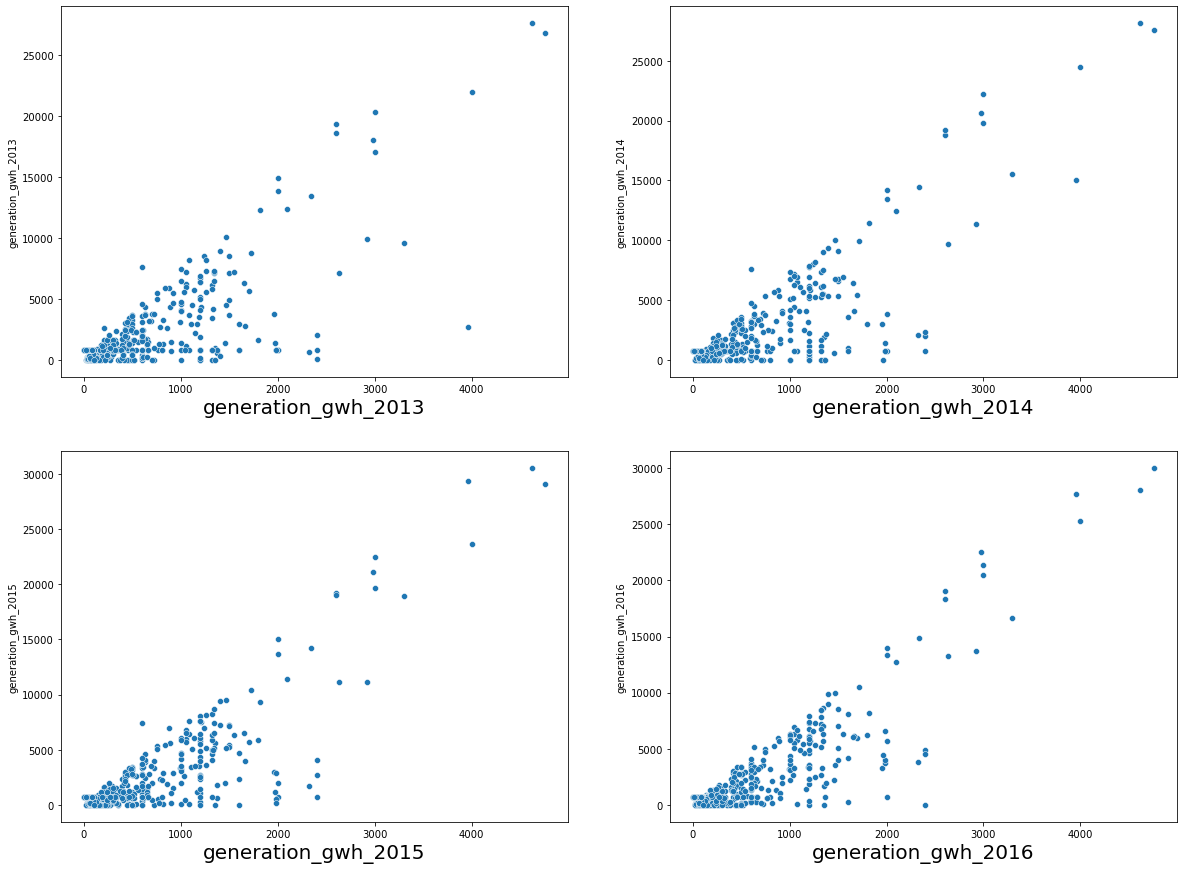

In [24]:
year=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df[year]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.scatterplot(x='capacity_mw',y=column,data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In 2013,2014,2015,2016 electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in all 4 years

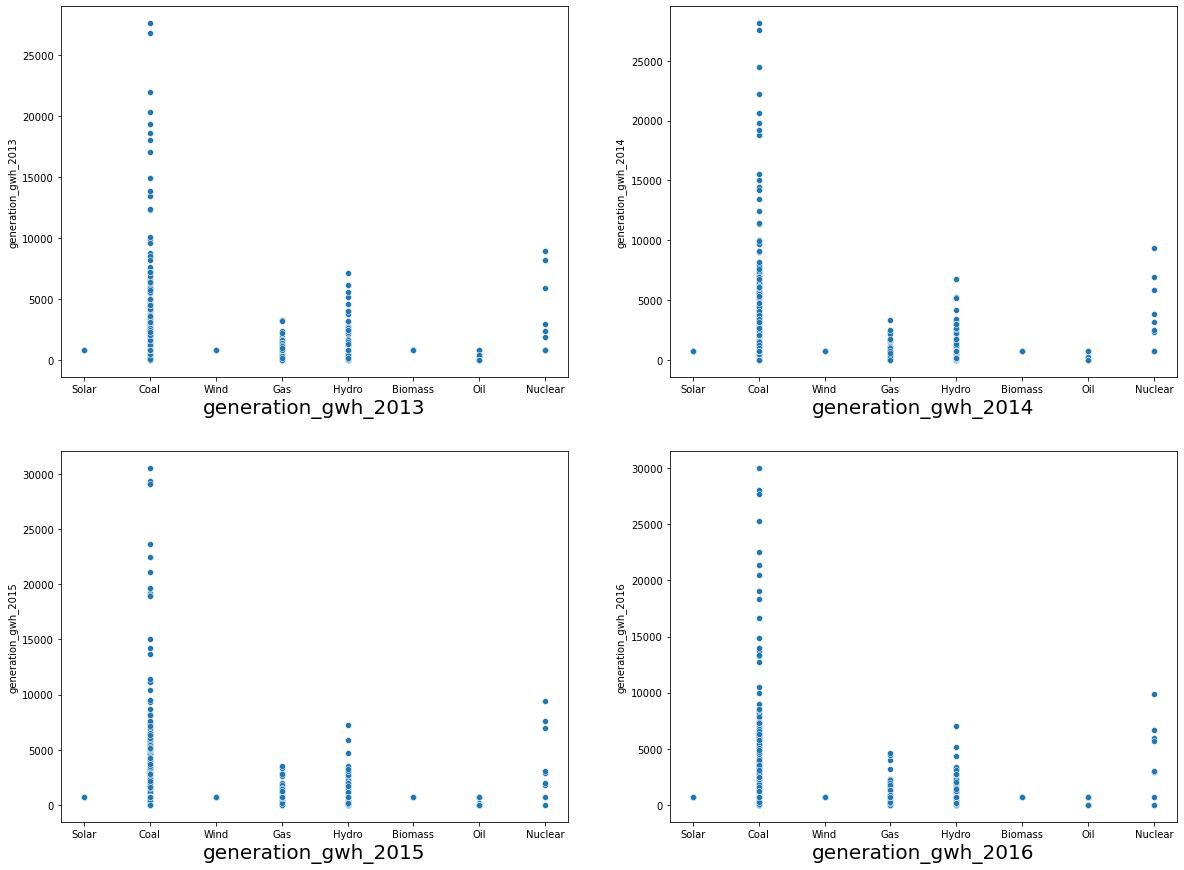

In [25]:
year=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016']
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df[year]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.scatterplot(x='primary_fuel',y=column,data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In 2013,2014,2015,2016 we can observe coal is used maximun,gas,hydro,nuclear is used average and solar wind,biomass and oil used very less

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

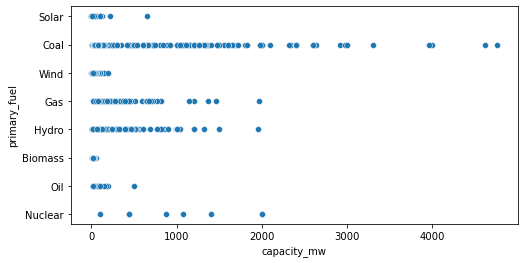

In [26]:
#In 2013,2014,2015,2016 we can observe coal is used maximun electrical generating capacity in megawatts
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

'primary_fuel','geolocation_source','source' are the categoricle data so we will apply LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder
feature=['primary_fuel','geolocation_source','source']
le=LabelEncoder()
df[feature]= df[feature].apply(le.fit_transform)

In [28]:
df[feature].head()

,primary_fuel,geolocation_source,source
0,6,1,109
1,1,2,174
2,7,2,21
3,2,2,22
4,1,2,22


In [29]:
#longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,
#generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 having skewness
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.150963
primary_fuel           0.471141
commissioning_year    -1.650230
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

In [30]:
# Creating correlation matrix
cor = df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.200473,-0.377783,0.215667,-0.241701,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,0.049790,1.000000,0.031483,-0.013453,0.083976,0.055943,-0.183999,0.054483,0.058936,0.054242,0.048095,0.057915
longitude,0.200473,0.031483,1.000000,-0.352749,0.035731,-0.236349,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,-0.377783,-0.013453,-0.352749,1.000000,-0.065716,0.053609,-0.482803,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818
commissioning_year,0.215667,0.083976,0.035731,-0.065716,1.000000,0.085523,-0.061057,0.052258,0.086131,0.118738,0.151269,0.164514
source,-0.241701,0.055943,-0.236349,0.053609,0.085523,1.000000,-0.505823,-0.121131,-0.125425,-0.131500,-0.136135,-0.135138
geolocation_source,0.204698,-0.183999,0.249233,-0.482803,-0.061057,-0.505823,1.000000,0.097530,0.100988,0.105880,0.109612,0.108809
generation_gwh_2013,0.756523,0.054483,0.102637,-0.228761,0.052258,-0.121131,0.097530,1.000000,0.970385,0.907385,0.878836,0.839297
generation_gwh_2014,0.804581,0.058936,0.107967,-0.240407,0.086131,-0.125425,0.100988,0.970385,1.000000,0.963664,0.935000,0.903986
generation_gwh_2015,0.830400,0.054242,0.125723,-0.249826,0.118738,-0.131500,0.105880,0.907385,0.963664,1.000000,0.973256,0.940284


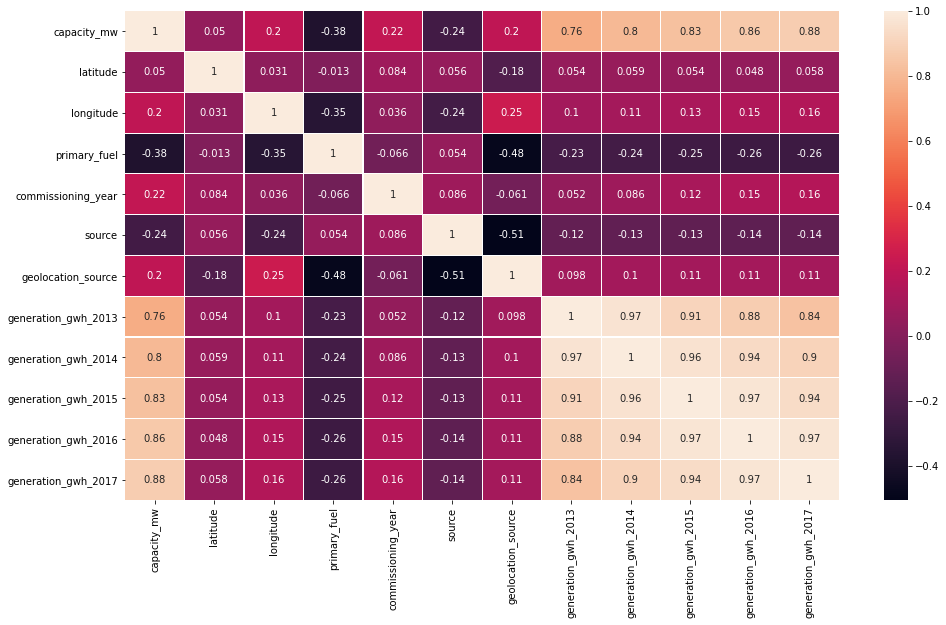

In [31]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

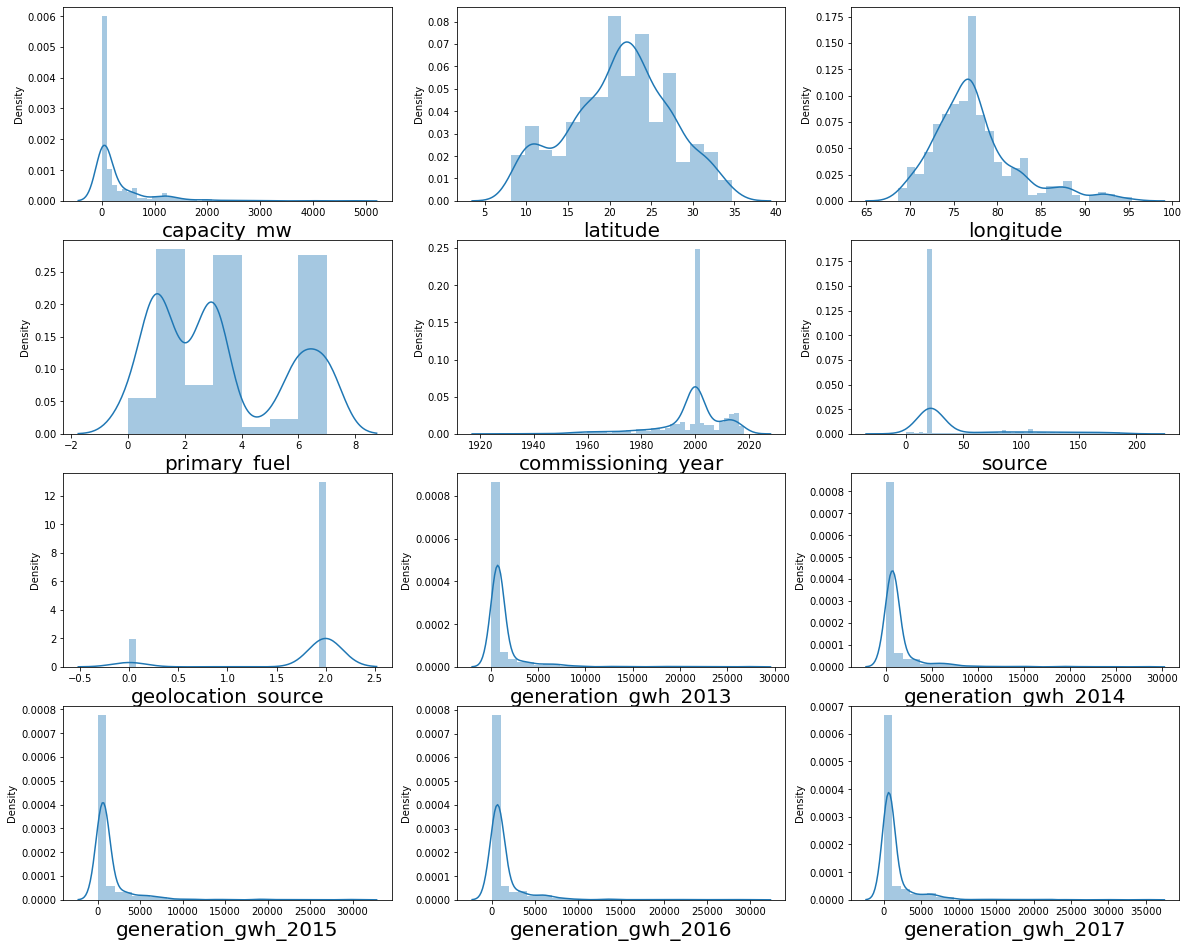

In [32]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df.columns:
    if plotnumber<=12:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Removing outliers
longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,
generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 having skewness

# Zscore method

In [33]:
features = ['longitude','commissioning_year','source','geolocation_source','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'] 


In [34]:
# removing outliers by Zscore
from scipy.stats import zscore
z=np.abs(zscore(df[features]))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,797.063475,805.760000,701.027250,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2000.0,174,2,797.063475,805.760000,701.027250,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,22,2,797.063475,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2000.0,77,0,797.063475,805.760000,701.027250,716.728350,807.601700
905,25.5,15.2758,75.5811,7,2000.0,21,2,797.063475,805.760000,701.027250,716.728350,807.601700
906,80.0,24.3500,73.7477,1,2000.0,59,2,797.063475,805.760000,701.027250,716.728350,807.601700


In [35]:
df.shape

(908, 12)

In [36]:
df_new.shape

(837, 12)

In [37]:
# Let's check the the data loss
data_loss = (908-837)/908*100
data_loss

7.819383259911894

7.819% data loss which is less than 10%

# IQR method

In [38]:
features1=df[features]
# 1st quantile
Q1=features1.quantile(0.25)
# 3rd quantile
Q3=features1.quantile(0.75)
# IQR
IQR=Q3 - Q1
df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
#Checking shape of new dataset
df_1.shape

(186, 12)

In [40]:
#Checking shape of old dataset
df.shape

(908, 12)

In [41]:
#Checking dataloss
Dataloss = (((908-186)/908)*100)
Dataloss

79.51541850220264

79.5% huge data loss in IQR methode so we will go with Zscore 

In [42]:
#still skewness is present will removing skewness using yeo-johnson
df_new.skew()

capacity_mw            2.106901
latitude              -0.110272
longitude              0.877378
primary_fuel           0.417360
commissioning_year    -1.195459
source                 1.790332
geolocation_source    -2.110249
generation_gwh_2013    3.061331
generation_gwh_2014    2.906650
generation_gwh_2015    2.681990
generation_gwh_2016    2.603132
generation_gwh_2017    2.500203
dtype: float64

In [43]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [44]:
#Removing skewness using yeo-johnson
df_new[features] = scaler.fit_transform(df_new[features].values)

In [45]:
df_new.skew()

capacity_mw            2.106901
latitude              -0.110272
longitude             -0.000282
primary_fuel           0.417360
commissioning_year    -0.219590
source                -0.181446
geolocation_source    -2.082067
generation_gwh_2013    0.268780
generation_gwh_2014    0.223272
generation_gwh_2015    0.153793
generation_gwh_2016    0.138297
generation_gwh_2017    0.116801
dtype: float64

Now we can almost skewness is removed,columns  in the acceptable range +0.5 or -0.5.

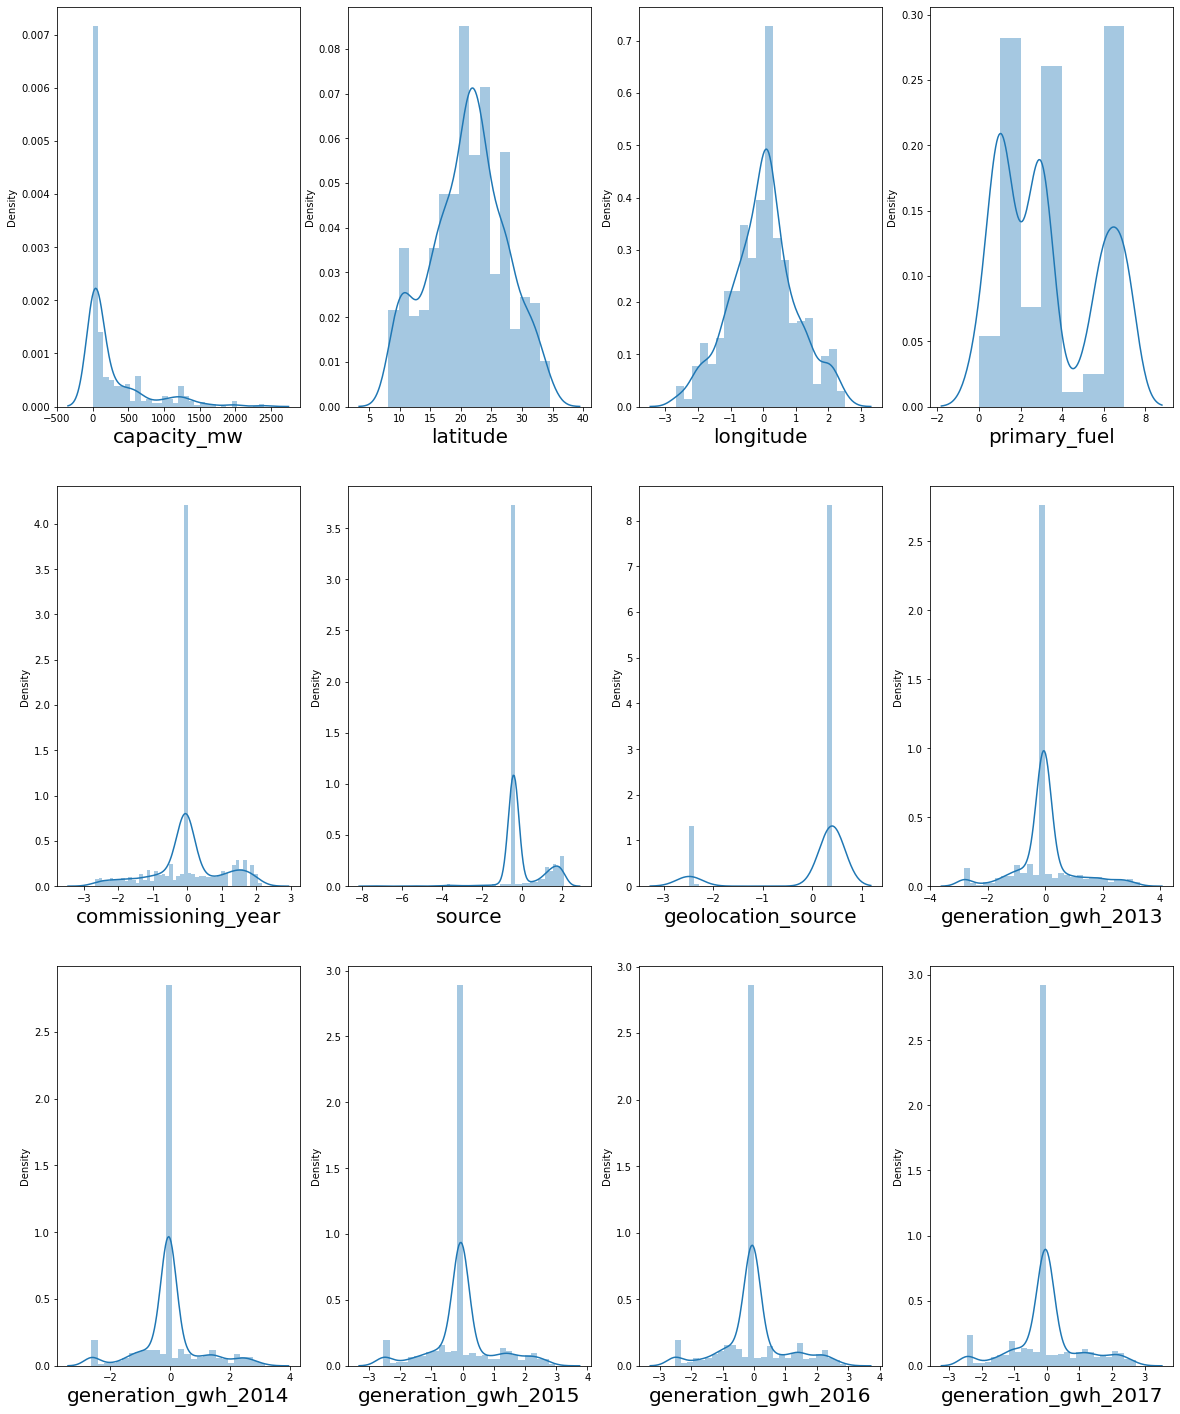

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new.columns:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [47]:
df_new.skew()

capacity_mw            2.106901
latitude              -0.110272
longitude             -0.000282
primary_fuel           0.417360
commissioning_year    -0.219590
source                -0.181446
geolocation_source    -2.082067
generation_gwh_2013    0.268780
generation_gwh_2014    0.223272
generation_gwh_2015    0.153793
generation_gwh_2016    0.138297
generation_gwh_2017    0.116801
dtype: float64

# 1....Prediction for capacity_mw

# Model Preparation

In [48]:
#drop capacity_mw from df_new to separate prediction feature
x = df_new.drop("capacity_mw",axis=1)
y = df_new["capacity_mw"]

# Standard scaler¶


In [49]:
#StandardScaler standardizes a feature using standard deviation
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.090739,latitude
1,1.318305,longitude
2,1.645695,primary_fuel
3,1.132383,commissioning_year
4,1.292900,source
5,1.713796,geolocation_source
6,5.474717,generation_gwh_2013
7,7.235043,generation_gwh_2014
8,6.170114,generation_gwh_2015
9,9.666381,generation_gwh_2016


multicolinearity issue is not present Since all the VIF features are less than 10 so no need to remove any column.

In [51]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.155064,-0.925483,1.173133,1.186302,1.618164,-2.288833,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
1,0.597188,-0.504437,-0.983968,-0.053761,2.092390,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
2,0.129924,-2.362469,1.604553,-0.053761,-0.467489,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
3,0.451075,2.496647,-0.552548,0.361484,-0.399180,0.403076,-0.257300,-0.274246,0.099785,0.117271,-0.190837
4,0.139147,1.279750,-0.983968,1.720343,-0.399180,0.403076,0.736635,1.409888,2.262674,2.248493,1.952764
...,...,...,...,...,...,...,...,...,...,...,...
832,-0.785652,0.230801,-0.983968,1.861638,-0.399180,0.403076,-0.044427,-0.045939,-2.430371,-0.819207,0.016510
833,-1.340933,0.422612,1.173133,-0.053761,1.233745,-2.487253,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
834,-0.952006,-0.228553,1.604553,-0.053761,-0.467489,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
835,0.529232,-0.764782,-0.983968,-0.053761,0.919710,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018


In [52]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [53]:
#find out which is best random state for spliting train and test data
from sklearn.tree import DecisionTreeRegressor
maxAccuracy=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    modDTR = DecisionTreeRegressor()
    
    # Training the model
    modDTR.fit(x_train, y_train)
    
    # Predcting the value
    pred = modDTR.predict(x_test)
    
    # r2 score
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is ",maxAccuracy," on Random_state ",maxRS)

Best accuracy is  0.8093734832612163  on Random_state  38


# Train, Test Split

In [54]:
#Random Forest Regressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

# Finding Best Algorithm

# Random Forest Regressor

In [55]:
ModRFR=RandomForestRegressor()
ModRFR.fit(x,y)
pred=ModRFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9787776422498512


# Linear Regression

In [58]:
modLR=LinearRegression()
modLR.fit(x,y)
pred=modLR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.5764981154406282


# K-Neighbors Regressor

In [60]:
knn=KNN()
knn.fit(x,y)
pred=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.8287598056184092


# Lasso and Ridge Regression

In [61]:
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modls=Lasso()
dfnew=GridSearchCV(modls,parameters)
dfnew.fit(x,y)
print(dfnew.best_params_)

{'alpha': 10, 'random_state': 0}


In [62]:
modls=Lasso(alpha=10,random_state=0)
modls.fit(x,y)
modls.score(x,y)
pred_ls=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.5734550776112143


In [63]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
modlr=Ridge()
dfnew=GridSearchCV(modlr,parameters)
dfnew.fit(x,y)
print(dfnew.best_params_)

{'alpha': 10, 'random_state': 0}


In [64]:
modlr=Ridge(alpha=10,random_state=0)
modlr.fit(x,y)
modls.score(x,y)
pred_lr=modls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.5734550776112143


# Support Vector Machine Regressor

In [65]:
svr=SVR()
svr.fit(x,y)
pred_test=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.8287598056184092


# Adaboost Regressor

In [66]:
AB=AdaBoostRegressor()
AB.fit(x,y)
pred=AB.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.6759396814909077


# Gradient Boosting Regressor

In [67]:
GB=GradientBoostingRegressor()
GB.fit(x,y)
pred=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9553772076895626


# ExtraT rees Regressor

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x,y)
pred=et.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9999076419576518


# Cross Validation Score

In [69]:
from sklearn.model_selection import cross_val_score
print("Linear Regression:",cross_val_score(modLR,x,y,cv=7,scoring="r2").mean())
print("Decision Tree Regressor:",cross_val_score(modDTR,x,y,cv=7,scoring="r2").mean())
print("K-Neighbors Regressor:",cross_val_score(knn,x,y,cv=7,scoring="r2").mean())
print("Random Forest Regressor:",cross_val_score(ModRFR,x,y,cv=7,scoring="r2").mean())
print("Adaboost Regressor:",cross_val_score(AB,x,y,cv=7,scoring="r2").mean())
print("GradientBoost Regressor:",cross_val_score(GB,x,y,cv=7,scoring="r2").mean())
print("Lasso Regression:",cross_val_score(modls,x,y,cv=7,scoring="r2").mean())
print("Ridge Regression:",cross_val_score(modlr,x,y,cv=7,scoring="r2").mean())
print("Support Vector Machine:",cross_val_score(svr,x,y,cv=7,scoring="r2").mean())
print("Extra Trees Regressor:",cross_val_score(et,x,y,cv=7,scoring="r2").mean())

Linear Regression: 0.499723527006774
Decision Tree Regressor: 0.6103357866478871
K-Neighbors Regressor: 0.7339515728557225
Random Forest Regressor: 0.7702177956697759
Adaboost Regressor: 0.527181311087266
GradientBoost Regressor: 0.7369875001943853
Lasso Regression: 0.506654943075991
Ridge Regression: 0.5023184126466669
Support Vector Machine: -0.12858695422204766
Extra Trees Regressor: 0.7864707227736758


Above are the cross validation scores of ModRFR, GB ad ET.And the difference between model r2_score and cross validation score is less for ExtraTreesRegressor, RandomForestRegressor we will tune it using for parameters.

# Hyper parameter tuning for ExtraTreesRegressor

In [70]:
params = {'n_estimators':[100,150,200,250],
         'max_depth':[7,9,11,13,15],
         'min_samples_split':[3,4,6,8],
         'bootstrap':[True, False],
         'n_jobs':[-1,-2,-3]}

In [71]:
et = GridSearchCV(ExtraTreesRegressor(),params,cv =7, n_jobs = -1)
et.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [7, 9, 11, 13, 15],
                         'min_samples_split': [3, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [72]:
#best parameters 
et.best_params_

{'bootstrap': True,
 'max_depth': 13,
 'min_samples_split': 6,
 'n_estimators': 100,
 'n_jobs': -1}

In [73]:
Final_mod=ExtraTreesRegressor(n_estimators=100,max_depth=15,min_samples_split=4,bootstrap='True',n_jobs=-2)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

81.29451431186921


# Hyper parameter tuning for RandomForestRegressor


In [74]:
parameter = {'criterion':["mse","mae","poisson"], 'random_state':[1,10,100,1000], 'max_depth':[4,5,7,8,9], 'max_features':["auto","sqrt","log2"] }

In [77]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=7)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [4, 5, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 10, 100, 1000]})

In [79]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 9,
 'max_features': 'sqrt',
 'random_state': 10}

In [80]:
Final_mod1=RandomForestRegressor(criterion='mse',max_depth=8,max_features='sqrt',random_state=100)
Final_mod1.fit(x_train,y_train)
pred=Final_mod1.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

81.45003775596497


So out of ExtraTree regressor and RandomForestRegressor, RandomForestRegressor is giving better acuracy so we will build model with Random forest regressor 

# Best Model Saving


In [81]:
import pickle
filename='PowerPlant.pkl'
pickle.dump(Final_mod1,open(filename,'wb'))

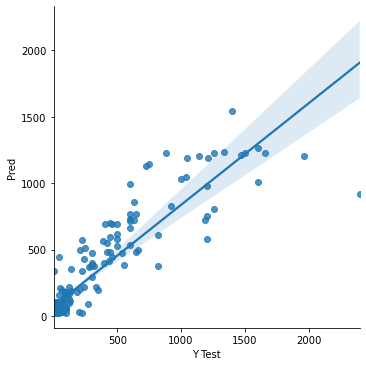

In [82]:
res=pd.DataFrame()
res['Actual']=y_test
pred_lr=Final_mod1.predict(x_test)

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')

# 2...Prediction for Fuel_type

In [91]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,-0.925483,6,1.186302,1.618164,-2.288833,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
1,98.0,24.7663,-0.504437,1,-0.053761,2.092390,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
2,39.2,21.9038,-2.362469,7,-0.053761,-0.467489,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
3,135.0,23.8712,2.496647,2,0.361484,-0.399180,0.403076,-0.257300,-0.274246,0.099785,0.117271,-0.190837
4,1800.0,21.9603,1.279750,1,1.720343,-0.399180,0.403076,0.736635,1.409888,2.262674,2.248493,1.952764
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,0.230801,1,1.861638,-0.399180,0.403076,-0.044427,-0.045939,-2.430371,-0.819207,0.016510
904,3.0,12.8932,0.422612,6,-0.053761,1.233745,-2.487253,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
905,25.5,15.2758,-0.228553,7,-0.053761,-0.467489,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018
906,80.0,24.3500,-0.764782,1,-0.053761,0.919710,0.403076,-0.044427,-0.045939,-0.052951,-0.054679,-0.039018


In [92]:
#Lets seperate label and features
df_x = df_new.drop(columns = "primary_fuel")
df_y = df_new["primary_fuel"]

In [94]:
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()
x= pd.DataFrame(ssc.fit_transform(df_new), columns=df_new.columns)

In [93]:
#lets check the value counts of the target variable
df_y.value_counts()

1    236
3    218
7    123
6    121
2     64
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

This is a multi-class classification problem. We can see, there is a problem of imbalance. we will go for oversampling using SMOTE

# SMOTE

In [95]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_1,y_1 = SM.fit_resample(df_x,df_y)

In [96]:
y_1.value_counts()

7    236
6    236
5    236
4    236
3    236
2    236
1    236
0    236
Name: primary_fuel, dtype: int64

# Model Preparation

In [97]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [98]:
#model with DecisionTreeClassifier
from sklearn.tree  import DecisionTreeClassifier
#Import required accuracy metrics for classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

max_accu = 0
max_rs = 0
for i in range(100,200):
    x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size = 0.25, random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.9088983050847458 on Random State 174


In [99]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_1,y_1, test_size = 0.25, random_state = max_rs )

# Decision Tree Classifier

In [100]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 90.67796610169492%
---------------------------------------------------
Confusion Matrix : 
 [[54  2  1  0  0  0  1  0]
 [ 3 47  4  4  4  0  0  0]
 [ 1  6 50  3  3  4  0  0]
 [ 0  1  2 49  1  1  0  0]
 [ 0  1  0  0 54  0  0  0]
 [ 0  1  0  1  0 61  0  0]
 [ 0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 61]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        58
           1       0.81      0.76      0.78        62
           2       0.88      0.75      0.81        67
           3       0.86      0.91      0.88        54
           4       0.87      0.98      0.92        55
           5       0.92      0.97      0.95        63
           6       0.98      1.00      0.99        52
           7       1.00      1.00      1.00        61

    accuracy                           0.91       472
   macro avg       0.91      0.91      0.91       472
weighted avg       0.91      0.91      0.90       47

# Random Forest Classifier

In [101]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 92.58474576271186%
---------------------------------------------------
Confusion Matrix : 
 [[58  0  0  0  0  0  0  0]
 [ 3 49  3  2  4  0  0  1]
 [ 0  5 56  1  2  3  0  0]
 [ 0  1  4 46  1  2  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  3  0  0 60  0  0]
 [ 0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 61]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       0.89      0.79      0.84        62
           2       0.85      0.84      0.84        67
           3       0.94      0.85      0.89        54
           4       0.89      1.00      0.94        55
           5       0.92      0.95      0.94        63
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        61

    accuracy                           0.93       472
   macro avg       0.93      0.93      0.93       472
weighted avg       0.93      0.93      0.92       47

# KNNeighbors Classifier

In [102]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_knn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_knn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_knn)}")

Accuracy Score: 71.82203389830508%
---------------------------------------------------
Confusion Matrix : 
 [[57  1  0  0  0  0  0  0]
 [ 7 32  6  2  7  2  2  4]
 [ 4 10 36  1  9  6  0  1]
 [ 3  6  9 25  2  3  1  5]
 [ 0  4  6  2 43  0  0  0]
 [ 1  0  2  4  0 56  0  0]
 [ 0  0  0  2  0  0 49  1]
 [ 6  4  0  4  1  2  3 41]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.73      0.98      0.84        58
           1       0.56      0.52      0.54        62
           2       0.61      0.54      0.57        67
           3       0.62      0.46      0.53        54
           4       0.69      0.78      0.74        55
           5       0.81      0.89      0.85        63
           6       0.89      0.94      0.92        52
           7       0.79      0.67      0.73        61

    accuracy                           0.72       472
   macro avg       0.71      0.72      0.71       472
weighted avg       0.71      0.72      0.71       47

In [103]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_svc)}")

Accuracy Score: 28.8135593220339%
---------------------------------------------------
Confusion Matrix : 
 [[ 0  0  0  0  0  0 58  0]
 [ 1  1  7  0 31 10 12  0]
 [ 1  0 22  0 20 16  8  0]
 [ 2  0  9  0  8 11 24  0]
 [ 0  0 18  0 36  1  0  0]
 [ 0  0  2  0  1 29 31  0]
 [ 0  0  0  0  0  4 48  0]
 [ 0  0  1  0  0  9 51  0]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       1.00      0.02      0.03        62
           2       0.37      0.33      0.35        67
           3       0.00      0.00      0.00        54
           4       0.38      0.65      0.48        55
           5       0.36      0.46      0.41        63
           6       0.21      0.92      0.34        52
           7       0.00      0.00      0.00        61

    accuracy                           0.29       472
   macro avg       0.29      0.30      0.20       472
weighted avg       0.30      0.29      0.20       472

# XGBClassifier

In [104]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_xgb)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

[19:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------------------
Accuracy Score: 93.22033898305084%
------------------------------------------------------
Confusion Matrix : 
 [[58  0  0  0  0  0  0  0]
 [ 4 47  2  5  3  0  0  1]
 [ 1  4 57  2  2  1  0  0]
 [ 0  1  4 47  0  2  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 63  0  0]
 [ 0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 61]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       0.90      0.76      0.82        62
           2       0.90      0.85      0.88        67
           3       0.87      0.87      0.87        54
       

# ExtraTreesClassifier

In [105]:
#lets check with ExtraTreesClassifier model
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 93.4322033898305%
------------------------------------------------------
Confusion Matrix : 
 [[58  0  0  0  0  0  0  0]
 [ 4 48  3  3  3  0  0  1]
 [ 0  4 58  1  1  3  0  0]
 [ 0  2  2 48  0  2  0  0]
 [ 0  0  1  0 54  0  0  0]
 [ 0  0  1  0  0 62  0  0]
 [ 0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 61]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       0.89      0.77      0.83        62
           2       0.89      0.87      0.88        67
           3       0.92      0.89      0.91        54
           4       0.93      0.98      0.96        55
           5       0.93      0.98      0.95        63
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        61

    accuracy                           0.93       472
   macro avg       0.94      0.94      0.94     

# LogisticRegression

In [106]:
#lets check with LogisticRegression model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_lg)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_lg)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_lg)}")

-------------------------------------------------------
Accuracy Score: 54.02542372881356%
------------------------------------------------------
Confusion Matrix : 
 [[34  0  0  0  0  0 10 14]
 [ 7 16  3  9 17  4  5  1]
 [ 1  7 15 23  6  6  6  3]
 [ 1  1  3 16  6  9  0 18]
 [ 0  7  3  5 39  1  0  0]
 [ 7  0  1  1  0 34 10 10]
 [ 0  0  0  0  0  0 52  0]
 [ 0  0  0 11  0  0  1 49]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.68      0.59      0.63        58
           1       0.52      0.26      0.34        62
           2       0.60      0.22      0.33        67
           3       0.25      0.30      0.27        54
           4       0.57      0.71      0.63        55
           5       0.63      0.54      0.58        63
           6       0.62      1.00      0.76        52
           7       0.52      0.80      0.63        61

    accuracy                           0.54       472
   macro avg       0.55      0.55      0.52    

As per the CV Score and Accuracy Score, So as per that , ExtraTreesClassifier is the best model.
Now We will try to improve the accuracy of the model through Hyper-parameter tuning.


# Hyper parameter Tuning 

In [110]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [111]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [-1, -2, -3, -4]})

In [112]:
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 16,
 'min_samples_split': 4,
 'n_estimators': 150,
 'n_jobs': -4}

In [113]:
et = ExtraTreesClassifier(class_weight= 'balanced',max_depth = 16,min_samples_split = 4, n_estimators = 150, n_jobs =-4)
et.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=16, min_samples_split=4,
                     n_estimators=150, n_jobs=-4)

In [114]:
#lets check with ExtraTreesClassifier model
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
pred_et = et.predict(x_test)
print("-------------------------------------------------------")

print(f"Accuracy Score: {accuracy_score(y_test,pred_et)*100}%")
print('------------------------------------------------------')
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_et)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_et)}")

-------------------------------------------------------
Accuracy Score: 93.22033898305084%
------------------------------------------------------
Confusion Matrix : 
 [[58  0  0  0  0  0  0  0]
 [ 4 49  2  3  3  0  0  1]
 [ 0  4 56  3  0  4  0  0]
 [ 0  2  3 47  0  2  0  0]
 [ 0  0  1  0 54  0  0  0]
 [ 0  0  0  0  0 63  0  0]
 [ 0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 61]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       0.89      0.79      0.84        62
           2       0.90      0.84      0.87        67
           3       0.89      0.87      0.88        54
           4       0.95      0.98      0.96        55
           5       0.91      1.00      0.95        63
           6       1.00      1.00      1.00        52
           7       0.98      1.00      0.99        61

    accuracy                           0.93       472
   macro avg       0.93      0.93      0.93    

Great we have model accuracy by doing hyperparameter tuning that is 93.22%.

# ROC Curve and AUC for final model
Pot shows AUC ROC curve each class of our target variable

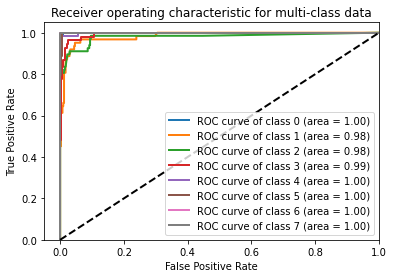

In [115]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


# Learn to predict each class against the other
classifier = OneVsRestClassifier(et)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
   
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


#Best Model Saving
Accuracy Score of models Extra Trees:94% which is best among all algorithm, Which is shown in ROC Plot. So we will choose Extra Trees classifier as best model

# Conclusion::Best Model

In [116]:
import pickle
filename='Global_Power.pkl'
pickle.dump(et,open(filename,'wb'))

      Actual  Predict
1850       7        7
915        0        0
119        6        6
1516       5        5
1506       5        5
...      ...      ...
1631       5        5
1615       5        5
538        0        0
978        0        0
777        3        3

[472 rows x 2 columns]


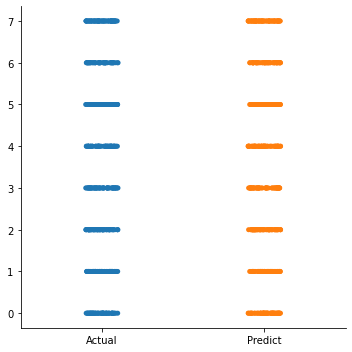

In [117]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=et.predict(x_test)

print(res)
sns.catplot(data=res)